<a href="https://colab.research.google.com/github/chitra-psg/lending-club/blob/master/customer_loan_profile_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
# Import the required modules
import pandas as pd
import seaborn as sns
import warnings


import matplotlib.pyplot as plt

In [113]:
# Configurations
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('darkgrid')
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# The dataset has many columns and the list is getting truncated in the output. Hence, adjusting the configuration
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [114]:
# Load the source data from GitHub into dataframe for analysis
# Load all column data in and then determine data type : low_memory=False
df_loan = pd.read_csv("https://github.com/chitra-psg/lending-club/blob/master/data/loan.csv?raw=True", low_memory=False)
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Data Cleansing

***Filtering columns required for the analysis***

Data has too many columns. We will shortlist columns based on the data availability in the columns and then perform analysis of the data to shortlist attributes further for our analysis

In [115]:
# Case 1 : Analyse missing values in all columns

# Calcualte missing values percentage for all columns
missing_value = round((df_loan.isnull().sum()/len(df_loan.index)) * 100, 1)

print('No. of columns  = ', missing_value.count())
print('No. of columns with missing values = ', missing_value[missing_value > 0].count())
print('No. of columns with more than 50% missing values = ', missing_value[missing_value > 50].count())

# Drop columns with more than 50% data missing
df_loan.drop(missing_value[ missing_value > 50 ].index, axis=1, inplace=True)

print('No. of columns after drop = ', len(df_loan.columns))

No. of columns  =  111
No. of columns with missing values =  66
No. of columns with more than 50% missing values =  57
No. of columns after drop =  54


In [116]:
# Case 2 : Check distinct values apart from Null in all columns

distinct_value = df_loan.nunique()
print('No. of columns  = ', distinct_value.count())
print('No. of columns with only one non NULL value = ', distinct_value[distinct_value ==1].count())

# Drop columns with just 1 non null value
df_loan.drop(distinct_value[ distinct_value == 1 ].index, axis=1, inplace=True)
print('No. of columns after drop = ', len(df_loan.columns))

No. of columns  =  54
No. of columns with only one non NULL value =  9
No. of columns after drop =  45


In [117]:
# Case 3 : Remove columns that are redundant or not useful for the use case we are analysing
# id          ->
# member_id   ->
# desc        ->
# url         ->

ls_columns_to_be_dropped = ['id','member_id', 'desc', 'url', 'zip_code', 'title', 'delinq_2yrs', 'earliest_cr_line', 'loan_amnt',
                            'inq_last_6mths', 'open_acc','pub_rec','revol_bal','total_acc','out_prncp', 'funded_amnt',
                            'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                            'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','pub_rec_bankruptcies']

df_loan.drop(ls_columns_to_be_dropped, axis=1, inplace=True)

***Filtering rows required for the analysis***

In [118]:
df_loan.shape

(39717, 17)

In [119]:
# Loan status Current is still in progressed so will exclude
df_closed_loan = df_loan[df_loan['loan_status'] != 'Current']

In [120]:
df_closed_loan.shape

(38577, 17)

***Standardising Values***

In [121]:
# issue_d data is available in MMM-YY format. Extract year and Month as separate columns
df_closed_loan['issue_month'] = pd.to_datetime(df_closed_loan['issue_d'], format='%b-%y').dt.month
df_closed_loan['issue_year'] = pd.to_datetime(df_closed_loan['issue_d'], format='%b-%y').dt.year

#Standardizing values in the below columns by removing non numeric characters

# It has % in the interest rate. % symbol will be removed
df_closed_loan['int_rate'] = df_closed_loan['int_rate'].str.extract('(\d+)', expand=False)
df_closed_loan['revol_util'] = df_closed_loan['revol_util'].str.extract('(\d+)', expand=False)

#Term has values like 36 months and 60 months. This will give 36 and 60 as output
df_closed_loan['term'] = df_closed_loan['term'].str.extract('(\d+)', expand=False)

# Emp length has <1 year, 10+ years, 3 years type of values. We will treat <1 as 1 and 10+ as 10 for the analysis
df_closed_loan['emp_length'] = df_closed_loan['emp_length'].str.extract('(\d+)', expand=False)  

In [122]:
df_closed_loan.head()

,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,revol_util,issue_month,issue_year
0,4975.00,36,10,162.87,B,B2,NaN,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,83,12,2011
1,2500.00,60,15,59.83,C,C4,Ryder,1,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,9,12,2011
2,2400.00,36,15,84.33,C,C5,NaN,10,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,98,12,2011
3,10000.00,36,13,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,21,12,2011
5,5000.00,36,7,156.46,A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,28,12,2011


**Identifying Outliers**



In [123]:
df_closed_loan.describe()

,funded_amnt_inv,installment,annual_inc,dti,issue_month,issue_year
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00
mean,10222.48,322.47,68777.97,13.27,7.11,2010.31
std,7022.72,208.64,64218.68,6.67,3.41,0.88
min,0.00,15.69,4000.00,0.00,1.00,2007.00
25%,5000.00,165.74,40000.00,8.13,4.00,2010.00
50%,8733.44,277.86,58868.00,13.37,7.00,2011.00
75%,14000.00,425.55,82000.00,18.56,10.00,2011.00
max,35000.00,1305.19,6000000.00,29.99,12.00,2011.00


Observed few outlier customers who fall under high annual income. 

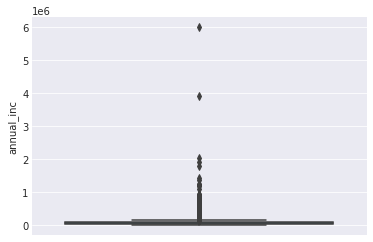

In [124]:
sns.boxplot( y="annual_inc",
            data=df_closed_loan)

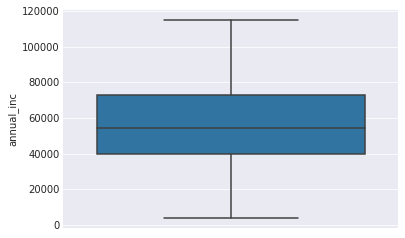

In [125]:
p_25  = df_closed_loan.annual_inc.quantile(0.25)
p_90  = df_closed_loan.annual_inc.quantile(0.90)
df_normalised_loan = df_closed_loan[~(df_closed_loan['annual_inc'] >= p_90 ) ]

sns.boxplot( y="annual_inc",
            data=df_normalised_loan)

In [126]:
print('Attibutes for analysis are -', df_normalised_loan.columns)

Attibutes for analysis are - Index(['funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'revol_util', 'issue_month', 'issue_year'],
      dtype='object')


# **Analysis**

***Univariate Analysis***

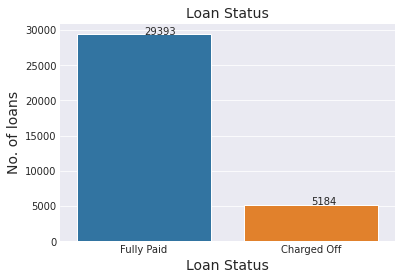

In [127]:
# Univariate Analysis on Loan Status
chrt = sns.countplot(x="loan_status",data=df_normalised_loan)
chrt.set_title('Loan Status',fontsize=14)
chrt.set_xlabel('Loan Status',fontsize=14)
chrt.set_ylabel('No. of loans',fontsize=14) 

# To show count of values above bars
df_cnt = df_normalised_loan['loan_status'].value_counts()
for i, v in df_cnt.reset_index().iterrows():
    chrt.text(i, v.loan_status + 0.3 , v.loan_status)

# Observation
# 14.9 % loans were charged off

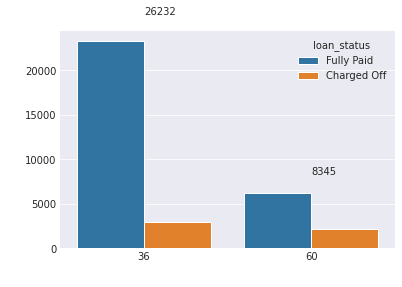

In [128]:
# Univariate Analysis on Terme by Status
chrt = sns.countplot(x="term", data=df_normalised_loan, hue='loan_status' , order = df_normalised_loan['term'].value_counts().index)
chrt.set_title('Purpose Of Loan',fontsize=14,color='w')
chrt.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
chrt.set_xlabel('No. of Loans',fontsize=14,color = 'w')  

# To show count of values above bars
df_cnt = df_normalised_loan['term'].value_counts()
for i, v in df_cnt.reset_index().iterrows():
    chrt.text(i, v.term + 0.3 , v.term)

plt.show()

# Obervation
# 76% loans are 36 months term

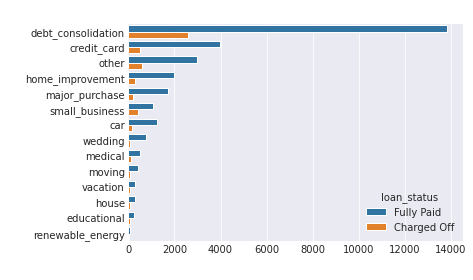

In [129]:
# Univariate Analysis on Loan Purpose by Status
chrt = sns.countplot(y="purpose", data=df_normalised_loan, hue='loan_status' , order = df_normalised_loan['purpose'].value_counts().index)
chrt.set_title('Purpose Of Loan',fontsize=14,color='w')
chrt.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
chrt.set_xlabel('No. of Loans',fontsize=14,color = 'w')      
plt.show()

# Obervation
# Debt Consolidation, Credit Card and Other are the top 3 purpose behind the loans that were charged off.

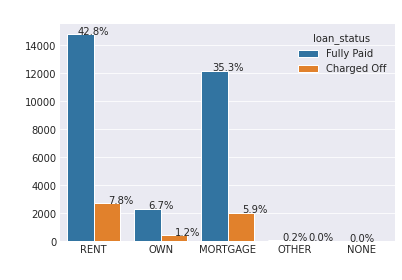

In [130]:
# Univariate Analysis on home ownership by Status
chrt = sns.countplot(x="home_ownership", data=df_normalised_loan, hue='loan_status')
chrt.set_title('Home Ownership',fontsize=14,color='w')
chrt.set_ylabel('Home Ownership',fontsize=14,color = 'w')
chrt.set_xlabel('No. of Loans',fontsize=14,color = 'w') 

total = float(len(df_normalised_loan))
for p in chrt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    chrt.annotate(percentage, (x, y), ha='center')
plt.show()

# Observation
# Applicants who fall under RENT have higher charged off loans [but not very high compared to Mortage].

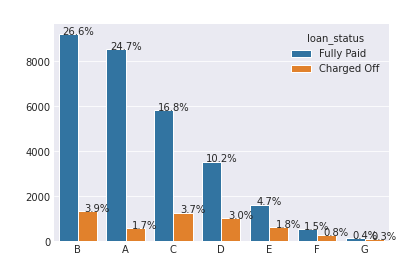

In [131]:
# Univariate Analysis on grade by Status
chrt = sns.countplot(x="grade", data=df_normalised_loan, hue='loan_status', order = df_normalised_loan['grade'].value_counts().index)
chrt.set_title('Loan Grade',fontsize=14,color='w')
chrt.set_ylabel('Loan Grade',fontsize=14,color = 'w')
chrt.set_xlabel('No. of Loans',fontsize=14,color = 'w') 

total = float(len(df_normalised_loan))
for p in chrt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    chrt.annotate(percentage, (x, y), ha='center')
plt.show()

# Observation
# Loans falling under Grade B, C and D have higher charged off

<Figure size 864x576 with 0 Axes>

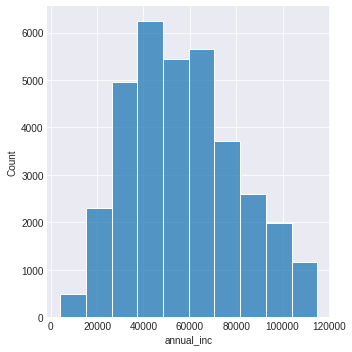

In [144]:
# Univariate Analysis on Annual Income 
plt.figure(figsize= (12,8))
chrt = sns.displot(df_normalised_loan['annual_inc'], bins=10)
plt.show()

# Observation
# People with Annual Income around 40000 have higher number of loans

***Multivariate Analysis***

In [133]:
def GetChargedOffPercentage(df_dataset, attribute_list):
  lst_attribute_list = list(attribute_list.split(","))
  print(lst_attribute_list)
  df_attribute_status = df_dataset.groupby(lst_attribute_list).loan_status.count().unstack().fillna(0).reset_index()
  df_attribute_status['Total'] = df_attribute_status['Charged Off'] + df_attribute_status['Fully Paid'] 
  df_attribute_status['Chargedoff%'] = (df_attribute_status['Charged Off'] / df_attribute_status['Total']) * 100
  return df_attribute_status

In [134]:
# create bins for int_rate range
rate_bins = [0, 7.5, 10, 12.5, 15, 100]
rate_bucket = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
df_normalised_loan['int_rate_range'] = pd.cut(df_normalised_loan['int_rate'].astype(int), rate_bins, labels=rate_bucket)
df_normalised_loan['int_rate_range'].value_counts()

12.5-15    8178
7.5-10     7515
0-7.5      7287
10-12.5    6915
15+        4682
Name: int_rate_range, dtype: int64

In [135]:
# create bins for dti range
dti_bin = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
dti_bucket = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
df_normalised_loan['dti_range'] = pd.cut(df_normalised_loan['dti'], dti_bin, labels=dti_bucket)
df_normalised_loan['dti_range'].value_counts()

10-15%    8611
15-20%    8125
5-10%     6701
20-25%    6238
0-5%      4296
25%+       606
Name: dti_range, dtype: int64

In [136]:
df_grade_status = GetChargedOffPercentage(df_normalised_loan, 'grade,loan_status')
df_grade_status.sort_values('Chargedoff%', ascending=False)

['grade', 'loan_status']


loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff%
6,G,88,138,226,38.94
5,F,267,533,800,33.38
4,E,617,1633,2250,27.42
3,D,1026,3530,4556,22.52
2,C,1275,5816,7091,17.98
1,B,1335,9207,10542,12.66
0,A,576,8536,9112,6.32


In [137]:
df_grade_status = GetChargedOffPercentage(df_normalised_loan, 'purpose,loan_status')
df_grade_status.sort_values('Chargedoff%', ascending=False)

['purpose', 'loan_status']


loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff%
11,small_business,435,1070,1505,28.90
10,renewable_energy,18,70,88,20.45
3,educational,53,252,305,17.38
8,moving,89,425,514,17.32
9,other,578,2959,3537,16.34
7,medical,99,508,607,16.31
5,house,50,268,318,15.72
2,debt_consolidation,2567,13852,16419,15.63
12,vacation,51,301,352,14.49
4,home_improvement,300,1998,2298,13.05


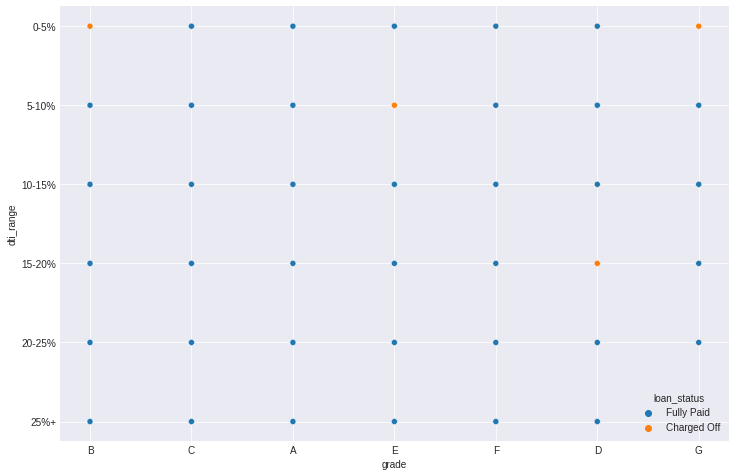

In [142]:
plt.figure(figsize= (12,8))
plt.style.use('seaborn-darkgrid')
sns.scatterplot(data = df_normalised_loan, x='grade', y='dti_range', hue='loan_status', color="red", marker="o")
plt.show()